# Prepare Workloads

In this notebook, we will try to prepare the workloads that we will be applying
to the deployments. Potentially, this leads to functions that will be called
when we want to send traffic to the deployment and we want to measure the system's
performance.

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# for iris classifier
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

In [8]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# get a list of datasets
tfds.list_builders()[:5]

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']

In [40]:
ds_iris = tfds.load('iris', split='train', shuffle_files=False)
print(ds_iris)

<_OptionsDataset shapes: {features: (4,), label: ()}, types: {features: tf.float32, label: tf.int64}>


In [41]:
for d in ds_iris.take(5):
    print(d['features'].numpy(), d['label'].numpy())

[5.1 3.4 1.5 0.2] 0
[7.7 3.  6.1 2.3] 2
[5.7 2.8 4.5 1.3] 1
[6.8 3.2 5.9 2.3] 2
[5.2 3.4 1.4 0.2] 0


In [42]:
# ds_image = tfds.load('cifar10', split='test', shuffle_files=True)
ds_image = tfds.load('imagenet_v2', split='test', shuffle_files=False)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling imagenet_v2-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset imagenet_v2 downloaded and prepared to /home/ubuntu/tensorflow_datasets/imagenet_v2/matched-frequency/2.0.0. Subsequent calls will reuse this data.


(224, 224, 3) 742
(224, 224, 3) 636
(224, 224, 3) 217
(224, 224, 3) 946
(224, 224, 3) 421


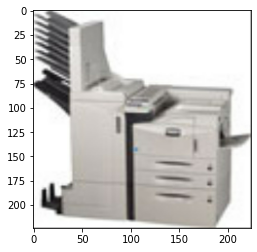

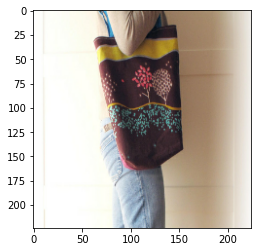

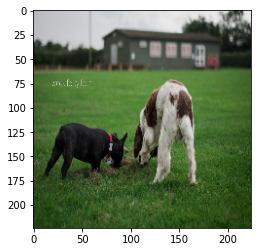

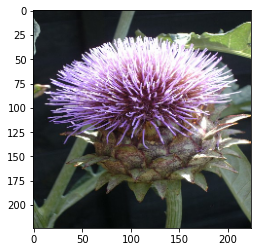

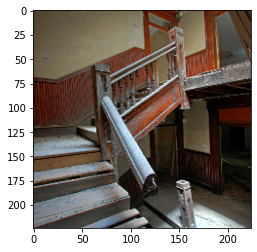

In [48]:
def parse_image(image):
    image = tf.cast(image, tf.float32)
    image = image / 255.0
    image = tf.image.resize(image, (224,224))
    image = image * 255.0
    image = tf.cast(image, tf.uint8)
    return image

for d in ds_image.take(5):
    image = d['image']
    label = d['label']

    image = parse_image(image)

    print(image.shape, label.numpy())
    plt.figure()
    plt.imshow(image)

# Send Data to Knative

Now that we have loaded our data into memory, let's try to send it to our deployment on knative.